In [26]:
from keras.src.layers import Dense,Conv2D, MaxPooling2D, Dropout
from keras.src.models import Sequential
from keras.api.models import load_model
from keras.src.utils import image_dataset_from_directory
from keras.api.optimizers import Adam

from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt

In [27]:
MODELS_DIR = "./models/"
MODEL_NAME = "model.keras"

DATA_DIR = "./data/"
DATASET_DIR_TRAIN = Path(DATA_DIR, "train")
DATASET_DIR_TEST = Path(DATA_DIR, "test")

In [28]:
BATCH_SIZE = 32
LEARNING_RATE = 0.0001
NUM_CLASSES = 6
EPOCHS = 10

In [29]:
classes = [
    'building',
    'forest',
    'glacer',
    'mountain',
    'sea',
    'street'
]

In [30]:
train = image_dataset_from_directory(
  DATASET_DIR_TRAIN,
  validation_split=0.2,
  subset="training",
  image_size=(512, 512),
  batch_size=BATCH_SIZE,
  label_mode="categorical"
)

test = image_dataset_from_directory(
    DATASET_DIR_TEST,
    validation_split=0.2,
    subset="validation",
    image_size=(512, 512),
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

NotFoundError: Could not find directory data\train

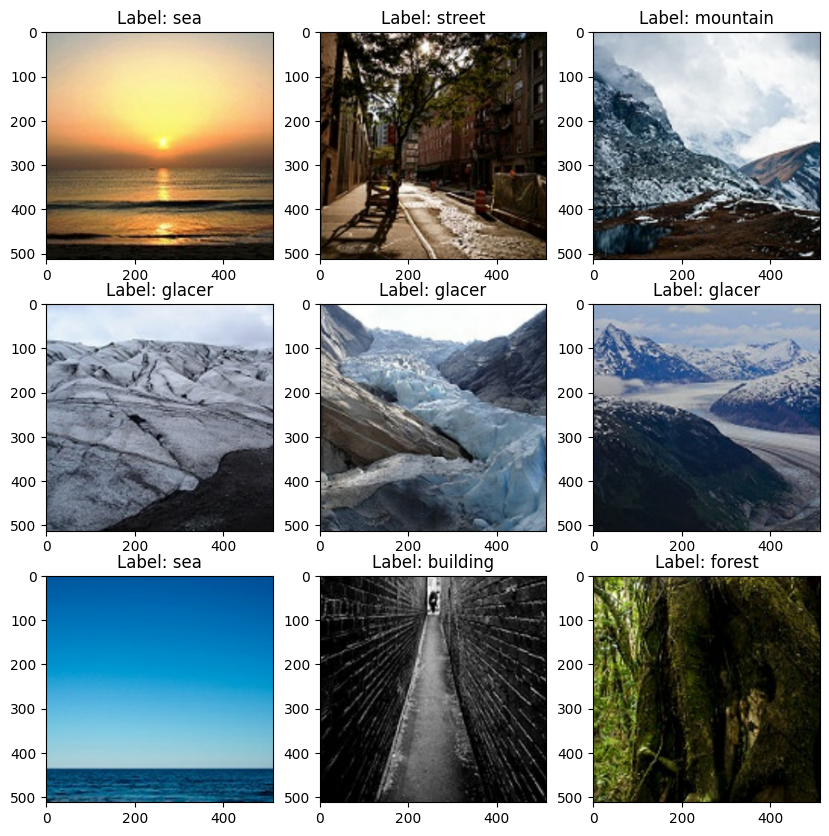

In [9]:
for images, labels in train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {classes[np.argmax(labels[i])]}")
    plt.show()
    break

In [10]:
pt_model = load_model(Path(MODELS_DIR, MODEL_NAME))

C:\Users\madro\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
pt_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380,182 (1.45 MB)

 Trainable params: 190,090 (742.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190,092 (742.55 KB)

In [20]:
new_model = Sequential()
new_model.add(Conv2D(3, (8, 8),strides = 8, activation='relu', name="transition_layer", input_shape=(512,512,3)))
new_model.add(Dropout(0.2, name="new_dropout_layer"))
new_model.add(MaxPooling2D(pool_size=(2, 2), name="transition_max_pool_label"))
new_model.add(Dropout(0.2, name="new_dropout_layer2"))



for layer in pt_model.layers[:-1]:
    layer.trainable = False
    new_model.add(layer)

new_model.add(Dense(NUM_CLASSES, activation='softmax'))
new_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ transition_layer (Conv2D)       │ (None, 64, 64, 3)      │           579 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ new_dropout_layer (Dropout)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transition_max_pool_label       │ (None, 32, 32, 3)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ new_dropout_layer2 (Dropout)    │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,409 (743.79 KB)

 Trainable params: 969 (3.79 KB)

 Non-trainable params: 189,440 (740.00 KB)

In [21]:
new_model.compile(loss='categorical_crossentropy', optimizer=Adam(LEARNING_RATE), metrics =['accuracy'])

In [22]:
new_model.fit(train,validation_data=test, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.1687 - loss: 99.0914 - val_accuracy: 0.1767 - val_loss: 10.2591
Epoch 2/10
117/351 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1728 - loss: 15.9140

KeyboardInterrupt: 